In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import math, re, os
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from kaggle_datasets import KaggleDatasets
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
print("Tensorflow version " + tf.__version__)
AUTO = tf.data.experimental.AUTOTUNE

# Detect TPU, return appropriate distribution strategy
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver() 
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    strategy = tf.distribute.get_strategy() 
print("REPLICAS: ", strategy.num_replicas_in_sync)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

Tensorflow version 2.12.0
REPLICAS:  1


In [2]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection. No parameters necessary if TPU_NAME environment variable is set. On Kaggle this is always the case.
    print('Running on TPU ', tpu.master())
except ValueError:
    print("No TPUs detected")
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
else:
    strategy = tf.distribute.get_strategy() # default distribution strategy in Tensorflow. Works on CPU and single GPU.

print("REPLICAS: ", strategy.num_replicas_in_sync)


No TPUs detected
REPLICAS:  1


In [3]:
import tensorflow as tf

# Check if running in Kaggle
try:
    import kaggle
    IN_KAGGLE = True
except ImportError:
    IN_KAGGLE = False

if IN_KAGGLE:
    try:
        # TPU detection
        tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
        print('Running on TPU ', tpu.master())

        # Connect to TPU
        tf.config.experimental_connect_to_cluster(tpu)
        tf.tpu.experimental.initialize_tpu_system(tpu)
        strategy = tf.distribute.TPUStrategy(tpu)
        print("REPLICAS: ", strategy.num_replicas_in_sync)
    except ValueError:
        print("No TPU detected")
else:
    print("Not running in Kaggle. TPU not available.")


OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.

In [6]:
pip install efficientnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
import os
import time
import shutil
import pathlib
import itertools

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import math
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import missingno as msno
import efficientnet.tfkeras as efn
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from keras.callbacks import EarlyStopping, LearningRateScheduler

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


In [8]:
train_csv = pd.read_csv("/kaggle/input/butterfly-image-classification/Training_set.csv")
test_csv = pd.read_csv("/kaggle/input/butterfly-image-classification/Training_set.csv")

In [9]:
def shape_of_ds(df, ds_name='df'):
    print(f"{ds_name} dataset has {df.shape[0]} rows and {df.shape[1]} columns")
    
def check_null(df, ds_name='df'):
    print(f"Number of null values in the {ds_name} dataset: ")
    print(df.isnull().sum())

def unique_vals(df, ds_name='df'):
    print(f"Number of unique values in {ds_name} dataset: ")
    print(df.nunique())
    
def seperator(sep=50):
    print("-"*sep)

In [10]:
train_csv.head()

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART


In [11]:
test_csv.head()

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART


In [12]:
shape_of_ds(train_csv, "Train")
shape_of_ds(test_csv, "Test")

Train dataset has 6499 rows and 2 columns
Test dataset has 6499 rows and 2 columns


In [13]:
train_csv['filename'] = '/kaggle/input/butterfly-image-classification/train/' + train_csv['filename']
test_csv['filename'] = '/kaggle/input/butterfly-image-classification/test/' + test_csv['filename']

In [14]:
train_size = 0.75
train_df, valid_df = train_test_split(train_csv,  train_size= train_size, shuffle= True, random_state= 123)

In [15]:
train_csv.count()

filename    6499
label       6499
dtype: int64

In [16]:
test_csv.count()

filename    6499
label       6499
dtype: int64

In [17]:
train_df.count()

filename    4874
label       4874
dtype: int64

In [18]:
shape_of_ds(train_df, "Train")
shape_of_ds(valid_df, "Valid")

Train dataset has 4874 rows and 2 columns
Valid dataset has 1625 rows and 2 columns


In [19]:
def count_plot(x, df, title, xlabel, ylabel, width, height, order = None, rotation=False, palette='winter', hue=None):
    ncount = len(df)
    plt.figure(figsize=(width,height))
    ax = sns.countplot(x = x, palette=palette, order = order, hue=hue)
    plt.title(title, fontsize=20)
    if rotation:
        plt.xticks(rotation = 'vertical')
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.show()

In [20]:
train_order = train_df['label'].value_counts()
train_order

MOURNING CLOAK               90
ORANGE TIP                   81
SCARCE SWALLOW               81
EASTERN PINE ELFIN           80
BROWN SIPROETA               76
                             ..
MALACHITE                    52
CRIMSON PATCH                52
AFRICAN GIANT SWALLOWTAIL    51
WOOD SATYR                   51
ELBOWED PIERROT              50
Name: label, Length: 75, dtype: int64

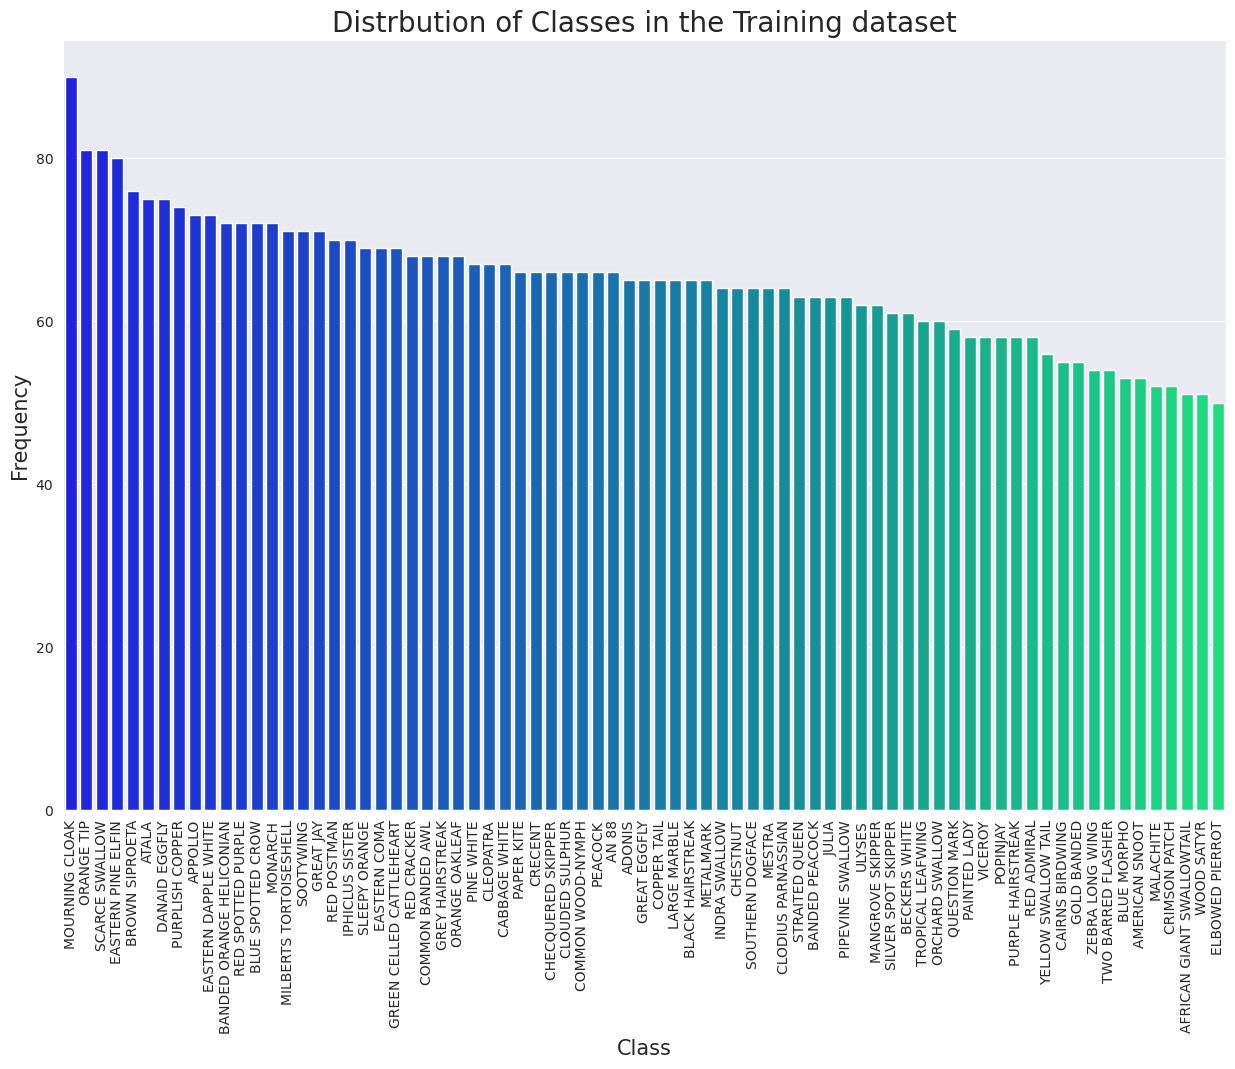

In [21]:
x = train_df['label']
count_plot(x, train_df, "Distrbution of Classes in the Training dataset", 'Class', 'Frequency', 15,10, order = train_order.index, rotation=True)

In [22]:
batch_size = 16
img_size = (128, 128)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

# Recommended : use custom function for test data batch size, else we can use normal batch size.
ts_length = len(test_csv)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

print(ts_length)
print(test_batch_size)
print(test_steps)

6499
67
97


In [23]:
train_df['filename'][0]

'/kaggle/input/butterfly-image-classification/train/Image_1.jpg'

In [29]:
def scalar(img):
    return img

tr_gen = ImageDataGenerator(preprocessing_function= scalar,
                            rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.1,
                            brightness_range=[0.5, 1.5],
                            horizontal_flip=True,
                            vertical_flip=True)

ts_gen = ImageDataGenerator(preprocessing_function= scalar,
                            rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.1,
                            brightness_range=[0.5, 1.5],
                            horizontal_flip=True,
                            vertical_flip=True)
train_gen = tr_gen.flow_from_dataframe( train_df, 
                                        x_col= 'filename', 
                                        y_col= 'label', 
                                        target_size= img_size, 
                                        class_mode= 'categorical',
                                        color_mode= 'rgb', 
                                        shuffle= True, 
                                        batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, 
                                       x_col= 'filename', 
                                       y_col= 'label', 
                                       target_size= img_size, 
                                       class_mode= 'categorical',
                                       color_mode= 'rgb', 
                                       shuffle= True, 
                                       batch_size= batch_size)

print("Number of training samples:", len(train_gen))
print("Number of validation samples:", len(valid_gen))

Found 4874 validated image filenames belonging to 75 classes.
Found 1625 validated image filenames belonging to 75 classes.
Number of training samples: 305
Number of validation samples: 102


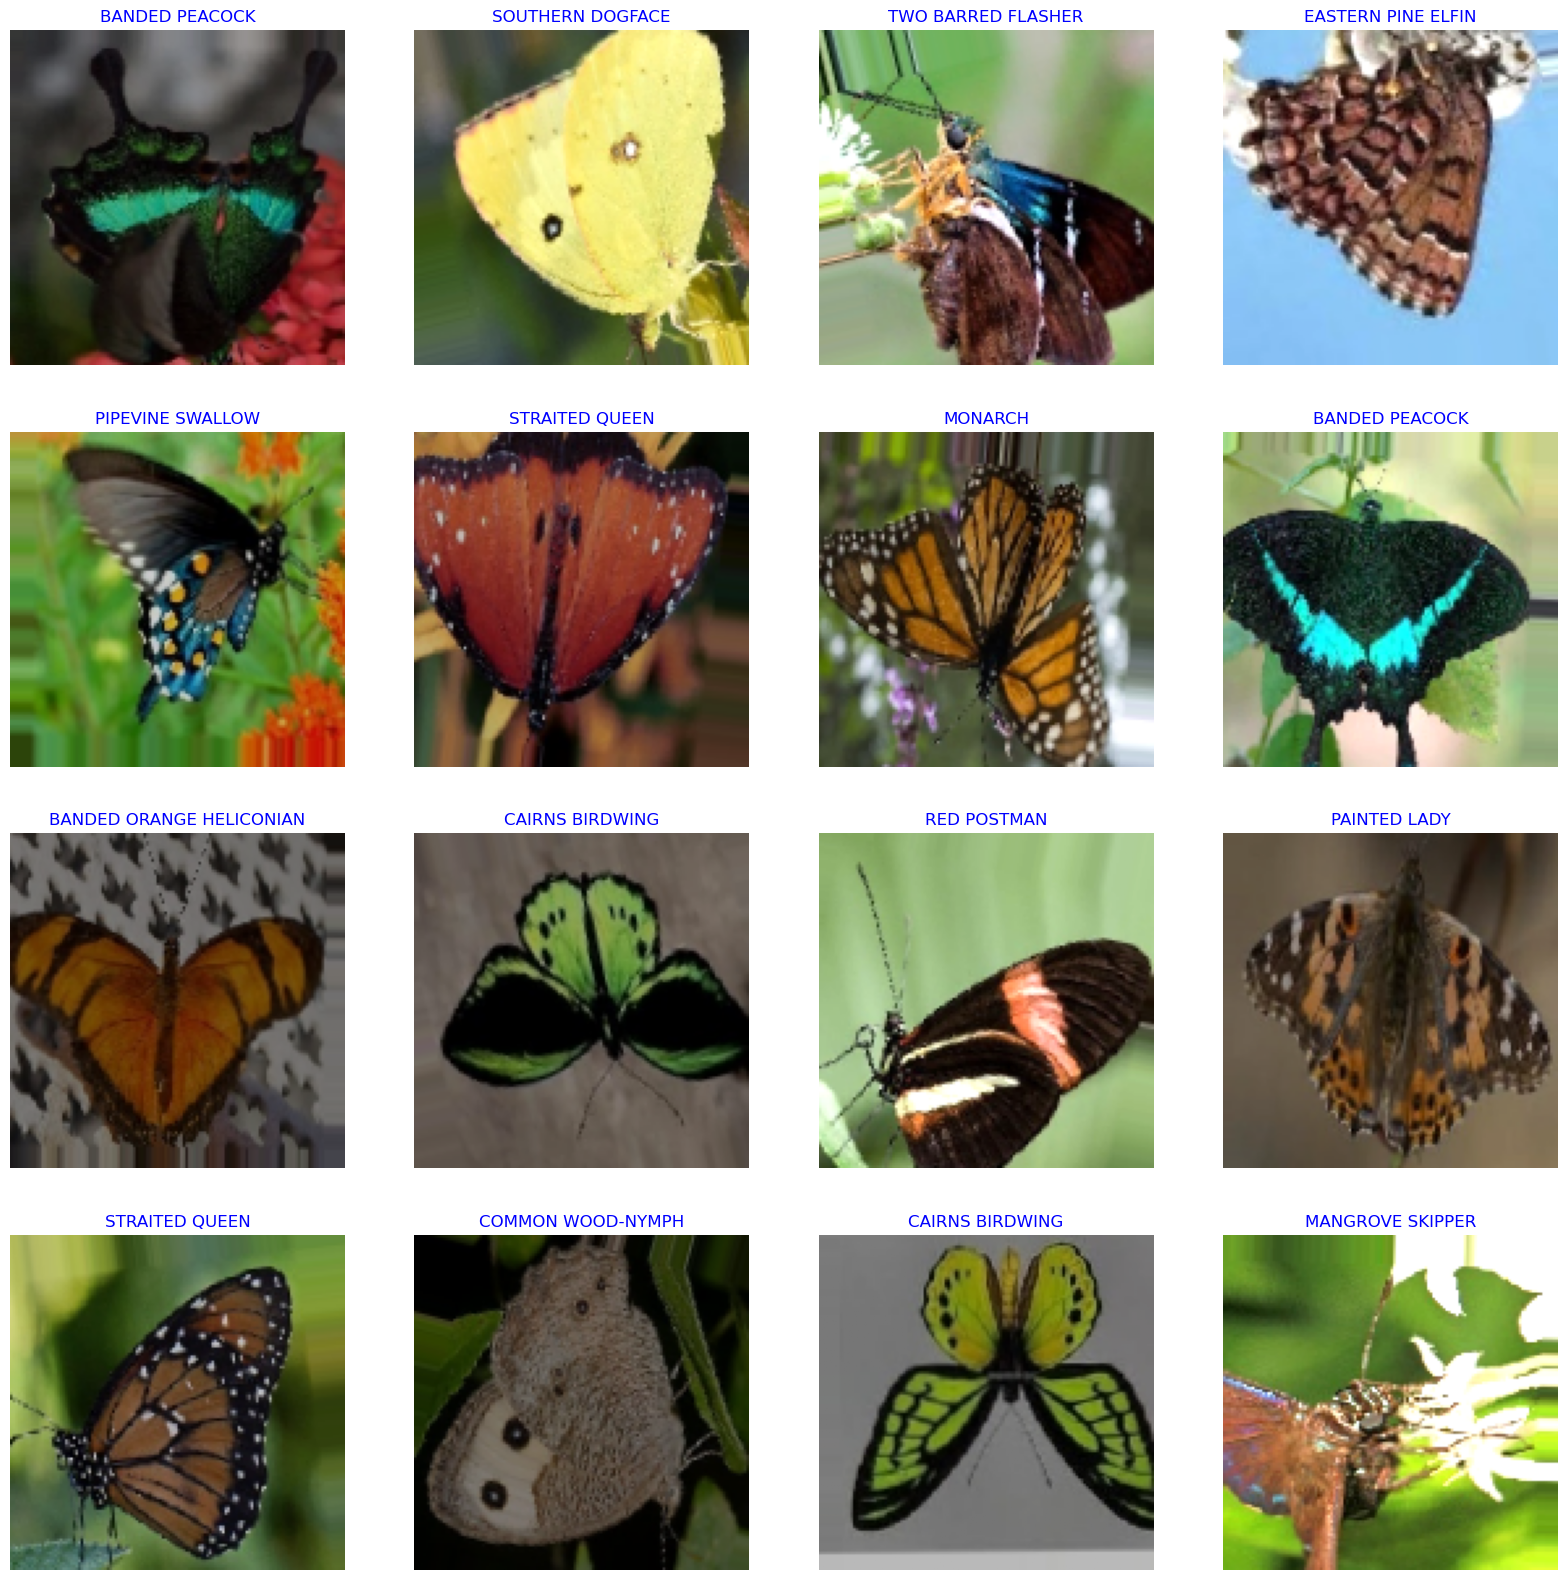

In [25]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()

In [26]:
NUM_CLASSES = 75  

efficientnet = tf.keras.Sequential([
    efn.EfficientNetB2(
        input_shape=(128, 128, 3),
        weights='imagenet',
        include_top=False
    ),
    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')  
])

efficientnet.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  
    metrics=['accuracy']
)

efficientnet.summary()

31936256/31936256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b2 (Functional  (None, 4, 4, 1408)       7768562   
 )                                                               
                                                                 
 global_max_pooling2d (Globa  (None, 1408)             0         
 lMaxPooling2D)                                                  
                                                                 
 dropout (Dropout)           (None, 1408)              0         
                                                                 
 dense (Dense)               (None, 75)                105675    
                                                                 
Total params: 7,874,237
Trainable params: 7,806,669
Non-trainable params: 67,568
__________________________________________

In [33]:
import time
from tqdm import tqdm
from tensorflow.keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier

EPOCHS = 150
BATCH_SIZE = 16

# Assuming `y_train` and `y_valid` are one-hot encoded labels
y_train = train_gen.classes
y_valid = valid_gen.classes

def create_model(learning_rate=0.001, dropout_rate=0.2):
    model = tf.keras.Sequential([
        efn.EfficientNetB2(
            input_shape=(128, 128, 3),
            weights='imagenet',
            include_top=False
        ),
        tf.keras.layers.GlobalMaxPooling2D(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(rate=dropout_rate),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'dropout_rate': [0.2, 0.3, 0.8]
}

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

best_accuracy = 0
best_params = {}

# Custom grid search loop
for lr in tqdm(param_grid['learning_rate']):
    for dr in tqdm(param_grid['dropout_rate']):
        # Create model
        model = create_model(learning_rate=lr, dropout_rate=dr)
        
        # Fit model
        history = model.fit(train_gen, epochs=EPOCHS, validation_data=valid_gen,
                            validation_steps=30, callbacks=[early_stopping], verbose=0)
        
        # Get validation accuracy
        val_accuracy = history.history['val_accuracy'][-1]
        
        # Check if this combination has the best accuracy
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_params = {'learning_rate': lr, 'dropout_rate': dr}

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)


  0%|          | 0/3 [00:00<?, ?it/s]2023-11-01 07:23:25.631925: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_10/efficientnet-b2/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer

 33%|███▎      | 1/3 [19:47<39:34, 1187.25s/it]2023-11-01 07:43:12.189508: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_11/efficientnet-b2/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer

 67%|██████▋   | 2/3 [35:57<17:39, 1059.87s/it]2023-11-01 07:59:23.032138: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_12/efficientnet-b2/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimiz

Best Parameters: {'learning_rate': 0.001, 'dropout_rate': 0.8}
Best Accuracy: 0.887499988079071


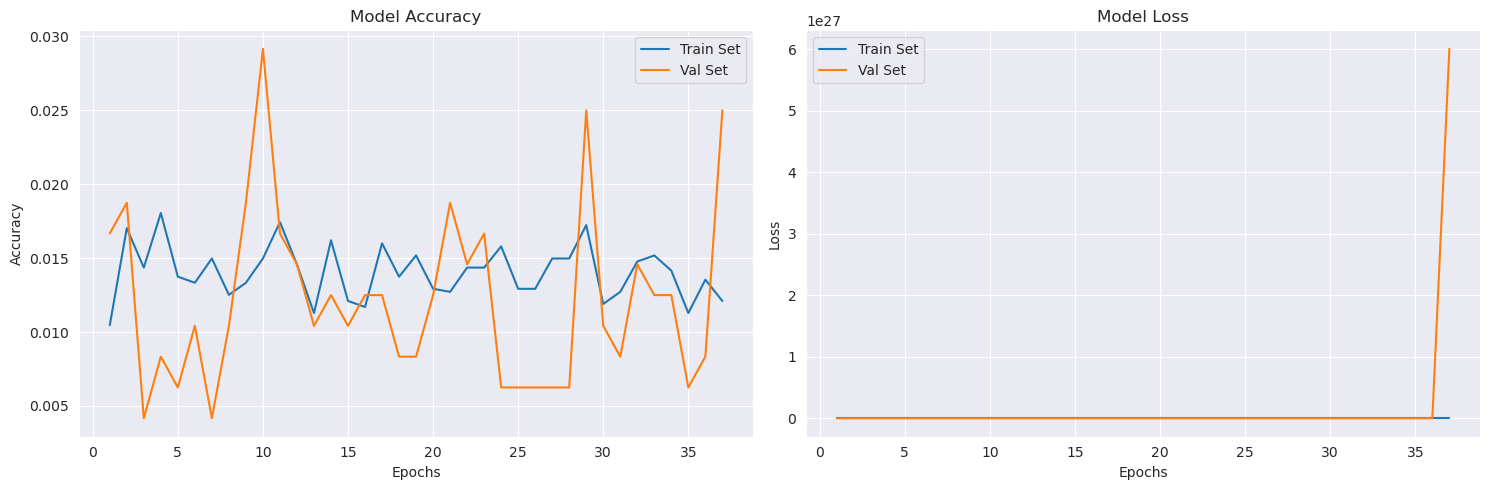

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

102/102 [==============================] - 10s 96ms/step
Micro-averaged Precision: 0.0111
Micro-averaged Recall: 0.0111
Micro-averaged F1 Score: 0.0111


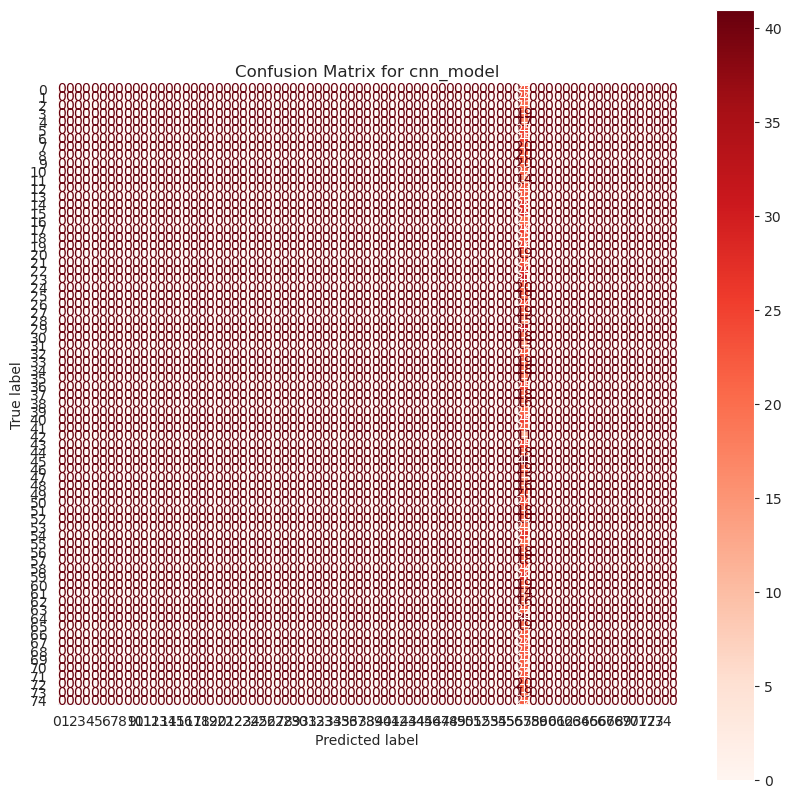

In [38]:
from sklearn.metrics import precision_recall_fscore_support, ConfusionMatrixDisplay
predictions1 = model.predict(valid_gen, steps=len(valid_gen), verbose=1)
predicted_labels1 = np.argmax(predictions1, axis=1)
true_labels1 = valid_gen.classes

# Calculate precision, recall, and f1-score
precision1, recall1, f1_1, _ = precision_recall_fscore_support(true_labels1, predicted_labels1, average='micro')

print(f"Micro-averaged Precision: {precision1:.4f}")
print(f"Micro-averaged Recall: {recall1:.4f}")
print(f"Micro-averaged F1 Score: {f1_1:.4f}")

# Calculate and plot confusion matrix
cm1 = confusion_matrix(true_labels1, predicted_labels1)
labels1 = [str(i) for i in range(NUM_CLASSES)]
fig, ax = plt.subplots(figsize=(10, 10))
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=labels1)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

disp1.plot(ax=ax, cmap='Reds')
plt.title('Confusion Matrix for cnn_model')
plt.show()